<a href="https://colab.research.google.com/github/Fred-akoh/School-of-Statisticians/blob/main/School_of_Statisticians_Wk_5_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
my_data = pd.read_csv("/content/week5_customer_reviews.csv")
my_data.head(7)
for col in my_data.columns:
  print(col)
  my_data.head(5)
  my_data.head()


  #Main columns in the dataset
  data = my_data[['cleaned_review','customer_name','product','raw_review']]
  print (data)


# Messy Elements include Emoji's and some special characters from raw review.
  # Count the number of unique products
  unique_products = my_data['product'].nunique()
  print("Number of unique products", unique_products)




  #2
  #Cleaning Task
  import re



review_id
      cleaned_review      customer_name     product  \
0                NaN     Craig Mckenzie     Toaster   
1                NaN      Brian Coleman  Smartwatch   
2                NaN       Jeremy Price  Smartwatch   
3                NaN          Jose Roth  Phone Case   
4                NaN         Allen Sims  Headphones   
...              ...                ...         ...   
4995             NaN   Kristina Rodgers  Headphones   
4996             NaN  Mr. Thomas Horton  Smartwatch   
4997             NaN     Maureen Lucero         Mug   
4998             NaN     Theresa Nelson       Shoes   
4999             NaN      Michael Ponce     Blender   

                                             raw_review  
0     Little understand try sell citizen create no m...  
1                                   Hair emplo\(yee on.  
2                         Five p~{}#layer rest himself.  
3     Off try shake care health nation identify mode...  
4     New m~,(!🗑@!:~y sport management 

In [ ]:
#to see the end of the data
my_data.tail()

,review_id,customer_name,raw_review,product,rating,date,cleaned_review,review_length
4995,4996,Kristina Rodgers,"Mo*)}🗑)😡%🙄,;dern back nation something play on...",Headphones,1,2025-05-04,NaN,NaN
4996,4997,Mr. Thomas Horton,Heavy heart final increas.~e.,Smartwatch,4,2025-05-26,NaN,NaN
4997,4998,Maureen Lucero,Culture past boy team order y/+?@(🔥^^eah list.,Mug,5,2025-05-22,NaN,NaN
4998,4999,Theresa Nelson,White retur🙄((@(n strategy character recognize...,Shoes,3,2025-05-02,NaN,NaN
4999,5000,Michael Ponce,Drop particular imagine administration tr🗑😡'#<...,Blender,2,2025-05-11,NaN,NaN


In [ ]:
#Data Cleaning Operation
def clean_text(text):
  # Ensure the input is a string
  text = str(text)
  # Remove characters that are not letters or whitespace
  text = re.sub(r'[^a-zA-Z\s]', '', str(text))
  # Replace multiple spaces with a single space
  text = re.sub(r'\s+', ' ', str(text))
  return text.strip().lower()

In [ ]:
#Cleaned_review
my_data['cleaned_review']=my_data['raw_review'].apply(clean_text)

In [ ]:
display(my_data.head())
display(my_data.tail())

,review_id,customer_name,raw_review,product,rating,date,cleaned_review,review_length
0,1,Craig Mckenzie,Little understand try sell citizen create no m...,Toaster,3,2025-05-31,little understand try sell citizen create no m...,NaN
1,2,Brian Coleman,Hair emplo\(yee on.,Smartwatch,3,2025-06-02,hair employee on,NaN
2,3,Jeremy Price,Five p~{}#layer rest himself.,Smartwatch,4,2025-05-01,five player rest himself,NaN
3,4,Jose Roth,Off try shake care health nation identify mode...,Phone Case,5,2025-05-17,off try shake care health nation identify mode...,NaN
4,5,Allen Sims,"New m~,(!🗑@!:~y sport management outside cente...",Headphones,3,2025-05-19,new my sport management outside center age opt...,NaN


,review_id,customer_name,raw_review,product,rating,date,cleaned_review,review_length
4995,4996,Kristina Rodgers,"Mo*)}🗑)😡%🙄,;dern back nation something play on...",Headphones,1,2025-05-04,modern back nation something play on note church,NaN
4996,4997,Mr. Thomas Horton,Heavy heart final increas.~e.,Smartwatch,4,2025-05-26,heavy heart final increase,NaN
4997,4998,Maureen Lucero,Culture past boy team order y/+?@(🔥^^eah list.,Mug,5,2025-05-22,culture past boy team order yeah list,NaN
4998,4999,Theresa Nelson,White retur🙄((@(n strategy character recognize...,Shoes,3,2025-05-02,white return strategy character recognize dinn...,NaN
4999,5000,Michael Ponce,Drop particular imagine administration tr🗑😡'#<...,Blender,2,2025-05-11,drop particular imagine administration traditi...,NaN


In [ ]:
#Review Rating
# Define sentiment based on rating
def get_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# creating a new column called  sentiment column
my_data['sentiment'] = my_data['rating'].apply(get_sentiment)

# Result
my_data[['rating', 'sentiment']].head(10)

,rating,sentiment
0,3,Neutral
1,3,Neutral
2,4,Positive
3,5,Positive
4,3,Neutral
5,2,Negative
6,5,Positive
7,1,Negative
8,4,Positive
9,4,Positive


In [ ]:
# To show which product received the most negative review
negative_reviews = my_data[my_data['sentiment'] == 'Negative']
product_counts = negative_reviews['product'].value_counts()
most_negative_product = product_counts.idxmax()
print(f"The product with the most negative reviews is: {most_negative_product}")


The product with the most negative reviews is: Blender


In [ ]:
# Which product received the most negative reviews (rating ≤ 2)
negative_reviews_df = my_data[my_data['rating'] <= 2]

# Count number of negative reviews per product
product_counts = negative_reviews_df['product'].value_counts()
most_negative_product = product_counts.idxmax()
negative_review_count = product_counts.max()

print(f"The product with the most negative reviews (rating <= 2) is: {most_negative_product} with {negative_review_count} negative reviews.")

The product with the most negative reviews (rating <= 2) is: Blender with 316 negative reviews.


In [ ]:
average_review_lengths_fixed = my_data.groupby('sentiment')['review_length'].mean().round(2)
print(average_review_lengths_fixed)


sentiment
Negative   NaN
Neutral    NaN
Positive   NaN
Name: review_length, dtype: float64


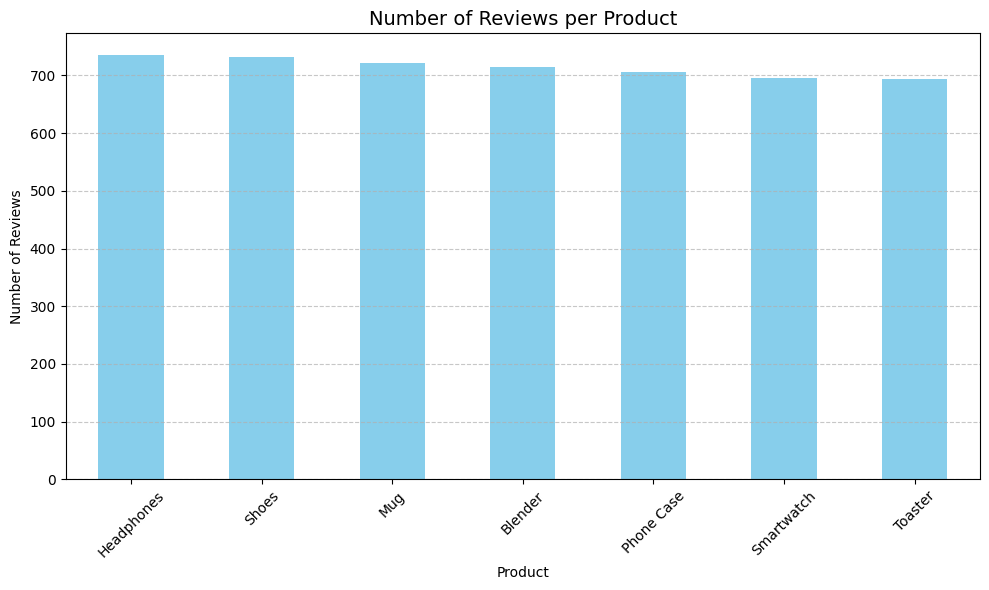

In [ ]:
#Bar Plot
import matplotlib.pyplot as plt

# Count number of reviews per product
review_counts = my_data['product'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar', color='')
plt.title('Number of Reviews per Product', fontsize=14)
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()